# **Project 1**
Name: Arun Sangar

Course: CPSC 483

**Pre-Processing**
---

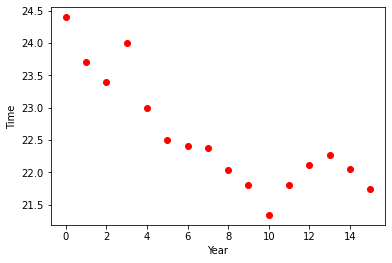

In [ ]:
import numpy as np
import pylab as plt

#read in data
data = np.genfromtxt('female200.csv',delimiter=',')

#setup x and target vectors
x = data[:,0][:,None]
t = data[:,1][:,None]

#scale x values
x = (x-1948)/4

#scatter plot
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Time')
plt.plot(x,t,'ro')
plt.show()

**Linear Regression**
---

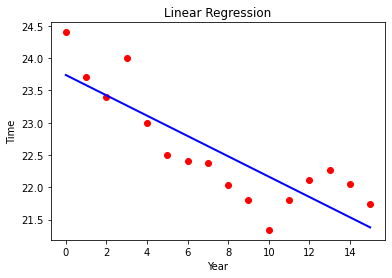

MSE: [0.21367695]


In [ ]:
#setup calculations
xbar = x.mean()
tbar = t.mean()
xxbar = np.multiply(x,x).mean()
xtbar = np.multiply(x,t).mean()

#calculate w0 and w1
w1 = (tbar*xbar-xtbar)/(xbar*xbar-xxbar)
w0 = tbar-w1*xbar

#plot data points with best fit linear model
x_test = np.linspace(0,15,100)[:,None]
f_test = w0+w1*x_test
%matplotlib inline
plt.title('Linear Regression')
plt.xlabel('Year')
plt.ylabel('Time')
plt.plot(x,t,'ro')
plt.plot(x_test,f_test,'b-',linewidth=2)
plt.show()

#calculate loss
loss = 0
for i in range(0,x.size):
  loss += (t[i]-(w0+w1*x[i]))**2
mse1 = loss/x.size
print("MSE:", mse1)

**3rd Order Polynomial**
---

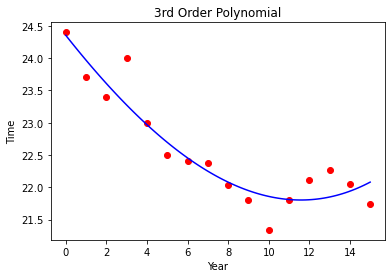

MSE: [0.08717867]


In [ ]:
#add on x^2 and x^3 variables to make a 3rd order polynomial
X = np.hstack((np.ones_like(x),x,x**2,x**3))

#calculate weight vector
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

#used for drawing
testx = np.linspace(0,15,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2,testx**3))
testt = np.dot(testX,w)

#used to compare 3rd and 5th oprder polynomial
testx3 = testx
testt3 = testt

#plot data points with best fit 3rd order polynomial
%matplotlib inline
plt.title('3rd Order Polynomial')
plt.xlabel('Year')
plt.ylabel('Time')
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')
plt.show()

#calculate loss
errors = np.subtract(t,(np.dot(X,w)))
mse3 = sum(np.dot(errors.T,errors))/x.size         
print("MSE:", mse3)

**5th Order Polynomial**
---

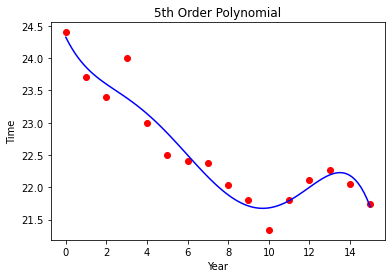

MSE: [0.05161528]


In [ ]:
#add on x^2,x^3,x^4,x^5 variables to make a 5th order polynomial
X = np.hstack((np.ones_like(x),x,x**2,x**3,x**4,x**5))

#calculate weight vector
XX = np.dot(X.T,X)
Xt = np.dot(X.T,t)
w = np.linalg.solve(XX,Xt)

#used for drawing
testx = np.linspace(0,15,100)[:,None]
testX = np.hstack((np.ones_like(testx),testx,testx**2,testx**3,testx**4,testx**5))
testt = np.dot(testX,w)

#used to compare 3rd and 5th oprder polynomial
testx5 = testx
testt5 = testt

#plot data points with best fit 5th order polynomial
%matplotlib inline
plt.title('5th Order Polynomial')
plt.xlabel('Year')
plt.ylabel('Time')
plt.plot(x,t,'ro')
plt.plot(testx,testt,'b')
plt.show()

#calculate loss
errors = np.subtract(t,(np.dot(X,w)))
mse5 = sum(np.dot(errors.T,errors))/x.size        
print("MSE:", mse5)

**Model Comparison**
---

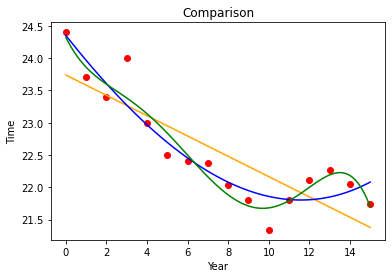

Linear Regression MSE: [0.21367695]
3rd Order Polynomial MSE: [0.08717867]
5th Order Polynomial MSE: [0.05161528]


In [ ]:
#compare all models
%matplotlib inline
plt.title('Comparison')
plt.xlabel('Year')
plt.ylabel('Time')
plt.plot(x,t,'ro')
plt.plot(x_test,f_test,'orange')
plt.plot(testx3,testt3,'blue')
plt.plot(testx5,testt5,'green')
plt.show()

print("Linear Regression MSE:", mse1)
print("3rd Order Polynomial MSE:", mse3)
print("5th Order Polynomial MSE:", mse5)

**L2 Regularization**
---

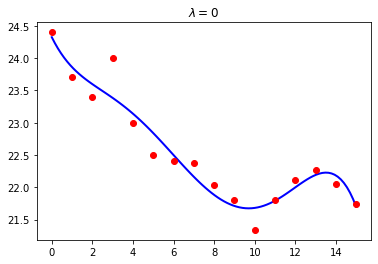

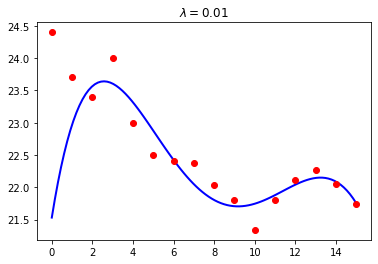

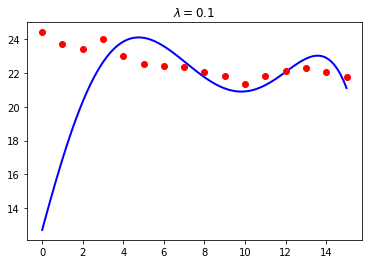

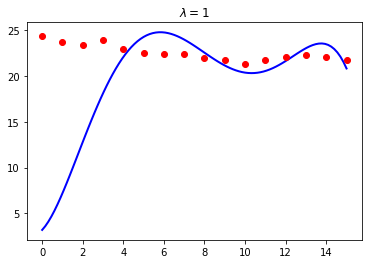

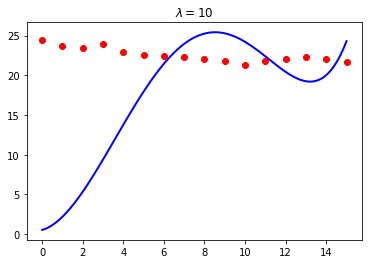

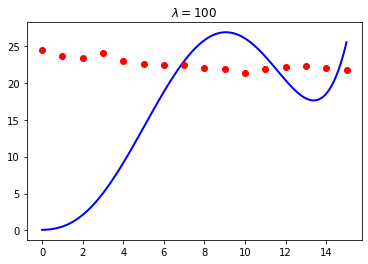

In [ ]:
#create X matrix for L2 regularization
maxorder = 5
x_test = np.linspace(0,15,100)[:,None]
X = np.ones_like(x)
X_test = np.ones_like(x_test)
for i in range(1,maxorder+1):
    X = np.hstack((X,x**i))
    X_test = np.hstack((X_test,x_test**i))

#iterate over lambda values and plot the respective graph
for lamb in [0,0.01,0.1,1,10,100]:
    w = np.linalg.solve(np.dot(X.T,X) + x.size*lamb*np.identity(maxorder+1),np.dot(X.T,t))
    f_test = np.dot(X_test,w)
    plt.figure()
    plt.plot(x_test,f_test,'b-',linewidth=2)
    plt.plot(x,t,'ro')
    title = '$\lambda=$%g'%lamb
    plt.title(title)